In [ ]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

import warnings

In [ ]:
df = pd.read_csv('train2.csv')
df_test = pd.read_csv('test.csv')

In [ ]:
df.head()

,Customer_ID,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,7242-QZLXF,Male,0,No,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,25.30,25.3,Yes
1,8325-QRPZR,Female,0,No,No,7,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,75.15,525,No
2,7874-ECPQJ,Female,0,No,Yes,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),20.05,85.5,No
3,2476-YGEFM,Female,0,No,No,29,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),76.00,2215.25,No
4,2276-YDAVZ,Female,0,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.10,270.7,Yes


In [ ]:
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_ID        5282 non-null   object 
 1   Gender             5282 non-null   object 
 2   Senior_Citizen     5282 non-null   int64  
 3   Partner            5282 non-null   object 
 4   Dependents         5282 non-null   object 
 5   Tenure             5282 non-null   int64  
 6   Phone_Service      5282 non-null   object 
 7   Multiple_Lines     5282 non-null   object 
 8   Internet_Service   5282 non-null   object 
 9   Online_Security    5282 non-null   object 
 10  Online_Backup      5282 non-null   object 
 11  Device_Protection  5282 non-null   object 
 12  Tech_Support       5282 non-null   object 
 13  Streaming_TV       5282 non-null   object 
 14  Streaming_Movies   5282 non-null   object 
 15  Contract           5282 non-null   object 
 16  Paperless_Billing  5282 

In [ ]:
#converting total charges to numeric data type
df['Total_Charges'] = pd.to_numeric(df['Total_Charges'],errors='coerce')
df_test['Total_Charges'] = pd.to_numeric(df_test['Total_Charges'],errors='coerce')
#errors='coerce' will convert any values that cannot be converted to a numeric type to NaN


In [ ]:
train=df.copy()
train.isnull().sum()


Customer_ID          0
Gender               0
Senior_Citizen       0
Partner              0
Dependents           0
Tenure               0
Phone_Service        0
Multiple_Lines       0
Internet_Service     0
Online_Security      0
Online_Backup        0
Device_Protection    0
Tech_Support         0
Streaming_TV         0
Streaming_Movies     0
Contract             0
Paperless_Billing    0
Payment_Method       0
Monthly_Charges      0
Total_Charges        8
Churn                0
dtype: int64

In [ ]:
test=df_test.copy()
df_test.isnull().sum()

Customer_ID          0
Gender               0
Senior_Citizen       0
Partner              0
Dependents           0
Tenure               0
Phone_Service        0
Multiple_Lines       0
Internet_Service     0
Online_Security      0
Online_Backup        0
Device_Protection    0
Tech_Support         0
Streaming_TV         0
Streaming_Movies     0
Contract             0
Paperless_Billing    0
Payment_Method       0
Monthly_Charges      0
Total_Charges        3
dtype: int64

In [ ]:
#removing null vaues
train.dropna(inplace=True)
test.dropna(inplace=True)
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5274 entries, 0 to 5281
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_ID        5274 non-null   object 
 1   Gender             5274 non-null   object 
 2   Senior_Citizen     5274 non-null   int64  
 3   Partner            5274 non-null   object 
 4   Dependents         5274 non-null   object 
 5   Tenure             5274 non-null   int64  
 6   Phone_Service      5274 non-null   object 
 7   Multiple_Lines     5274 non-null   object 
 8   Internet_Service   5274 non-null   object 
 9   Online_Security    5274 non-null   object 
 10  Online_Backup      5274 non-null   object 
 11  Device_Protection  5274 non-null   object 
 12  Tech_Support       5274 non-null   object 
 13  Streaming_TV       5274 non-null   object 
 14  Streaming_Movies   5274 non-null   object 
 15  Contract           5274 non-null   object 
 16  Paperless_Billing  5274 

In [ ]:
train = train.drop(columns=['Customer_ID'])
train.head()


,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,Male,0,No,Yes,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,25.30,25.30,Yes
1,Female,0,No,No,7,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,75.15,525.00,No
2,Female,0,No,Yes,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),20.05,85.50,No
3,Female,0,No,No,29,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),76.00,2215.25,No
4,Female,0,No,No,3,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.10,270.70,Yes


In [ ]:
test= test.drop(columns=['Customer_ID'])
test.head()

,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.80
1,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45
2,Female,0,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.70
3,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35
4,Male,0,No,No,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.10


In [ ]:
print(train.columns)


Index(['Gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Tenure',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charges', 'Total_Charges', 'Churn'],
      dtype='object')


<Axes: xlabel='Churn', ylabel='count'>

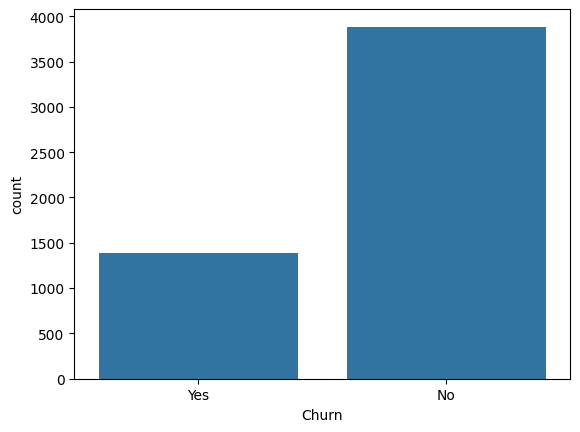

In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning) #to make the overall experience better
sns.countplot(data=train,x='Churn')

<Figure size 640x480 with 0 Axes>

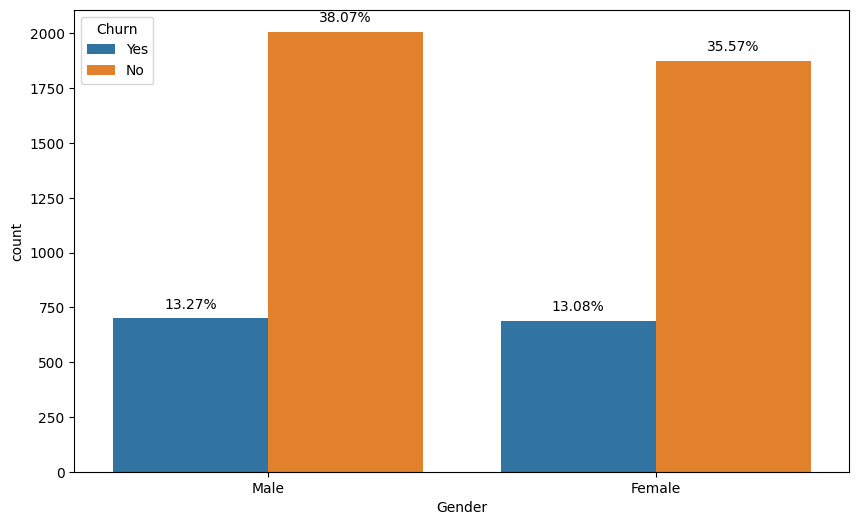

<Figure size 640x480 with 0 Axes>

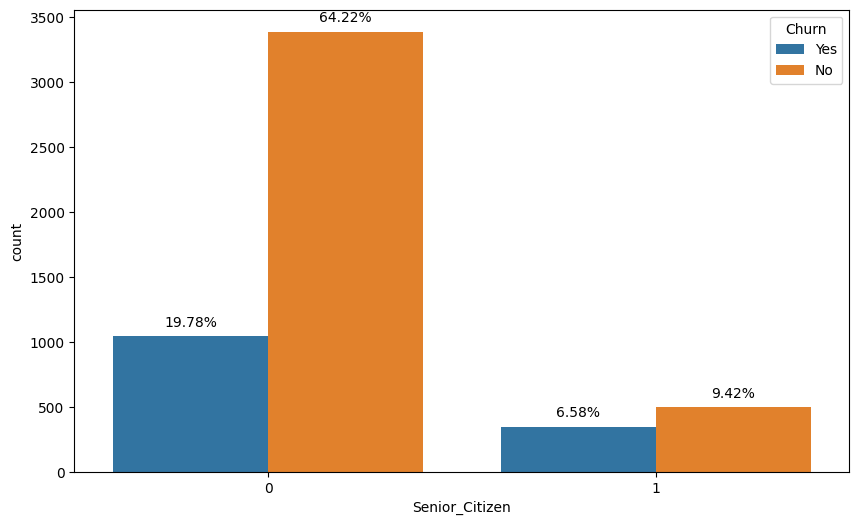

<Figure size 640x480 with 0 Axes>

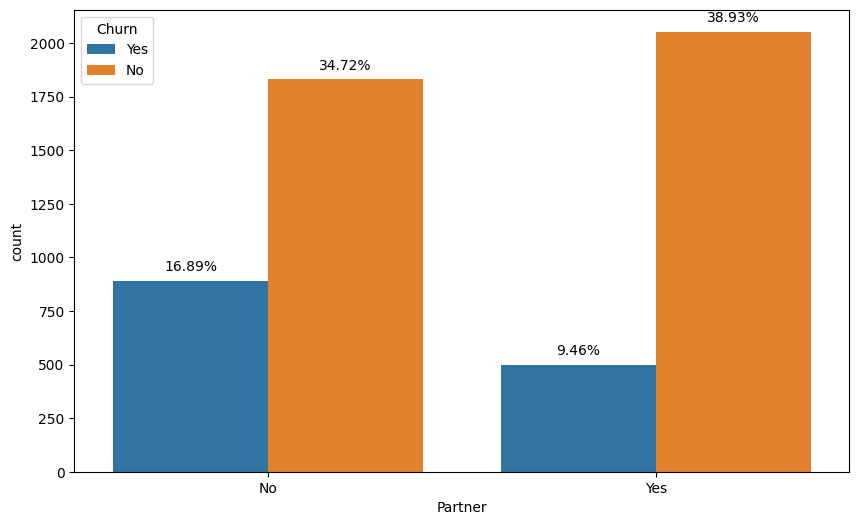

<Figure size 640x480 with 0 Axes>

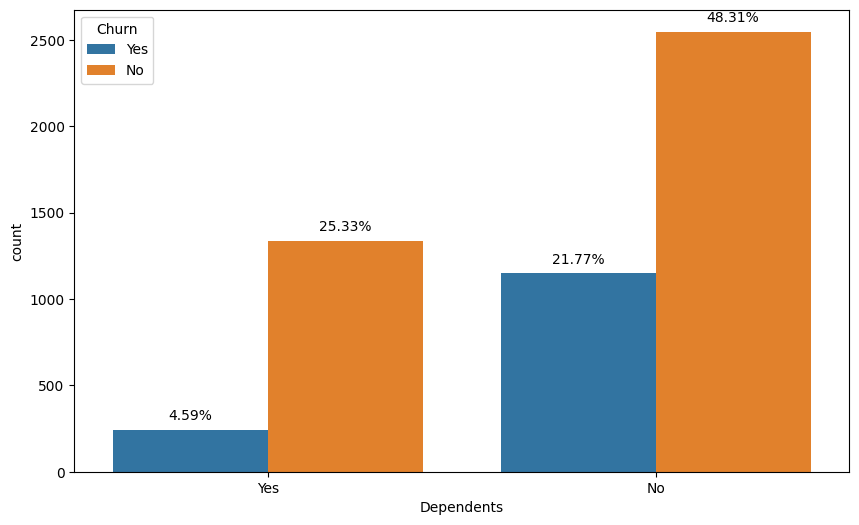

<Figure size 640x480 with 0 Axes>

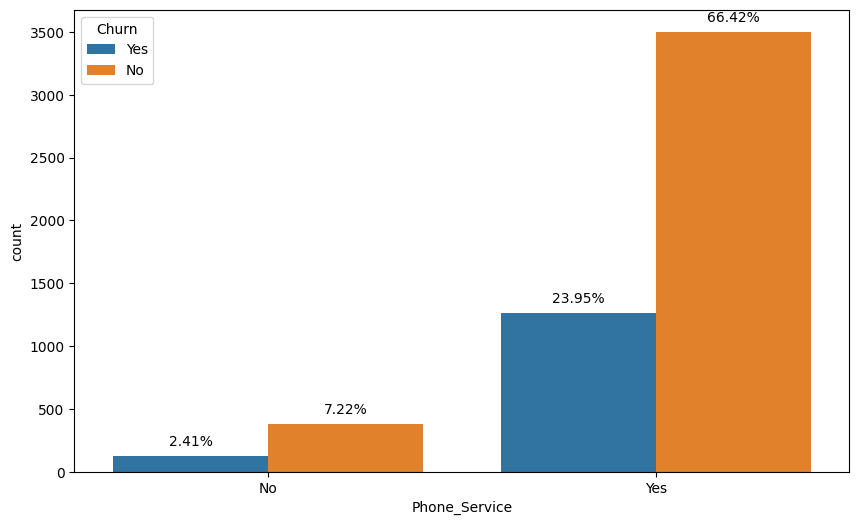

<Figure size 640x480 with 0 Axes>

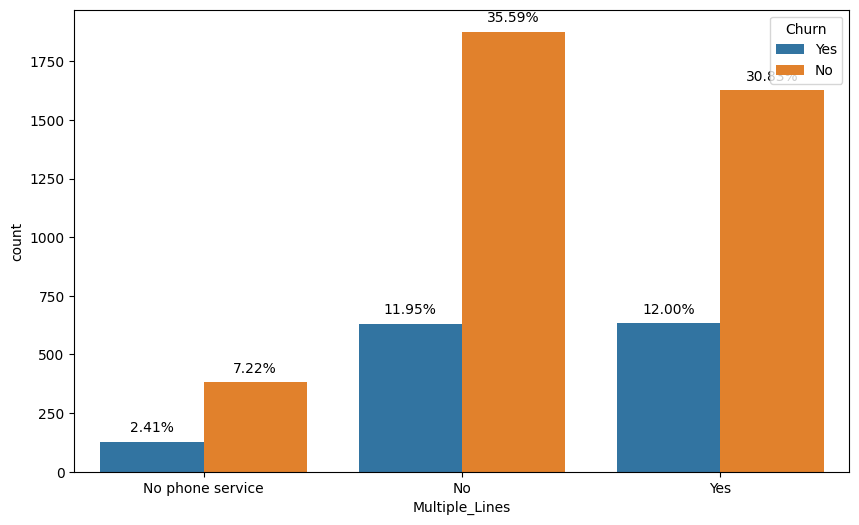

<Figure size 640x480 with 0 Axes>

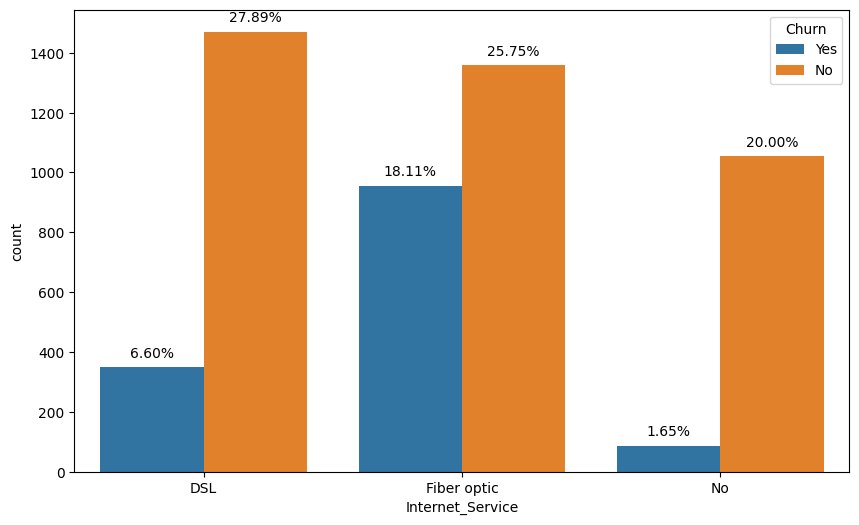

<Figure size 640x480 with 0 Axes>

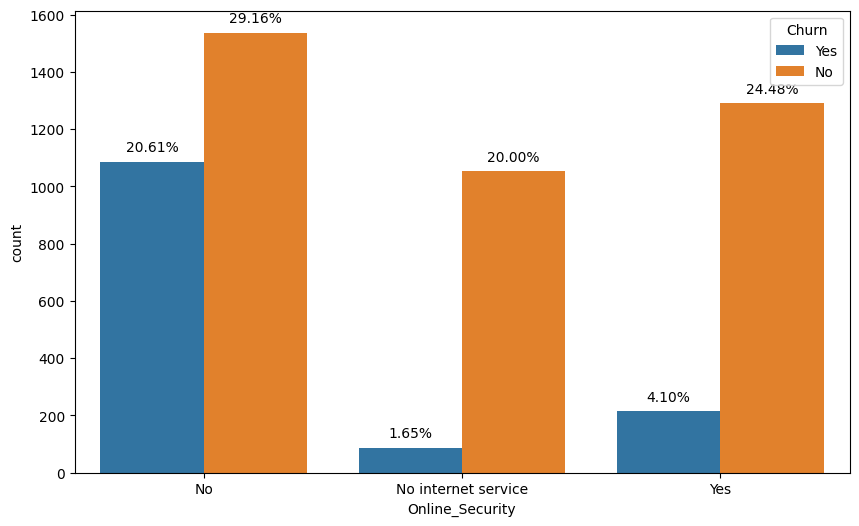

<Figure size 640x480 with 0 Axes>

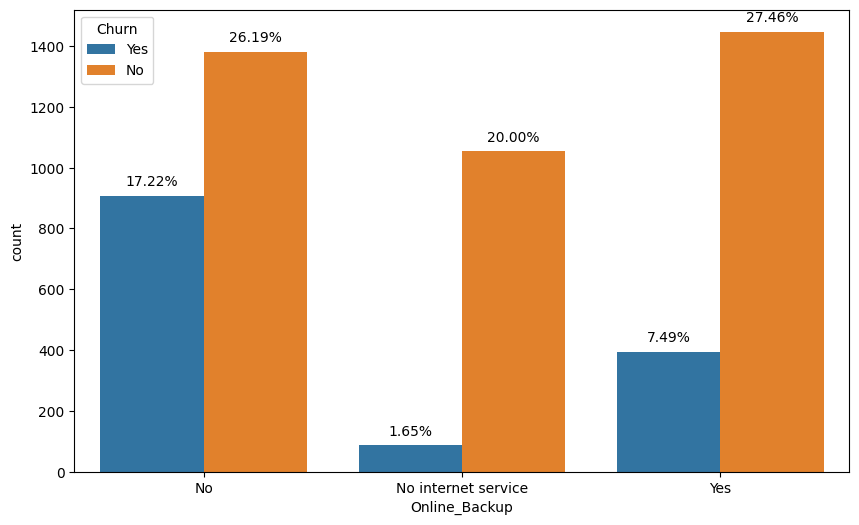

<Figure size 640x480 with 0 Axes>

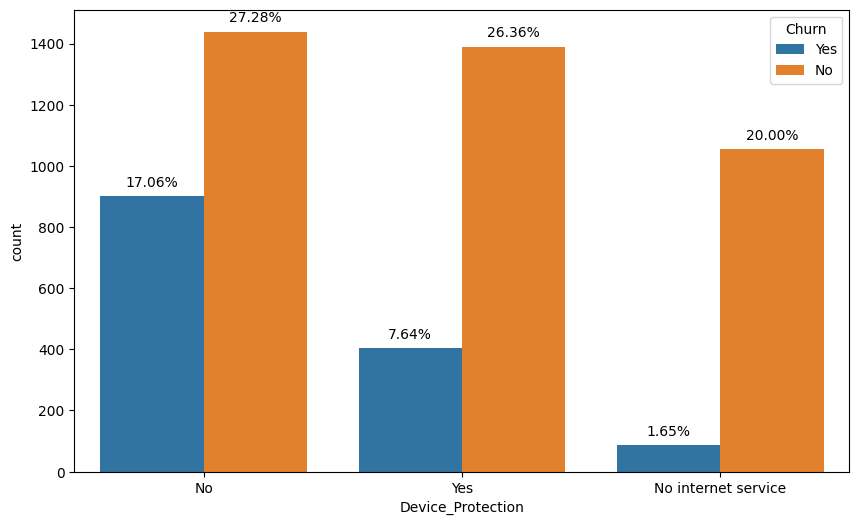

<Figure size 640x480 with 0 Axes>

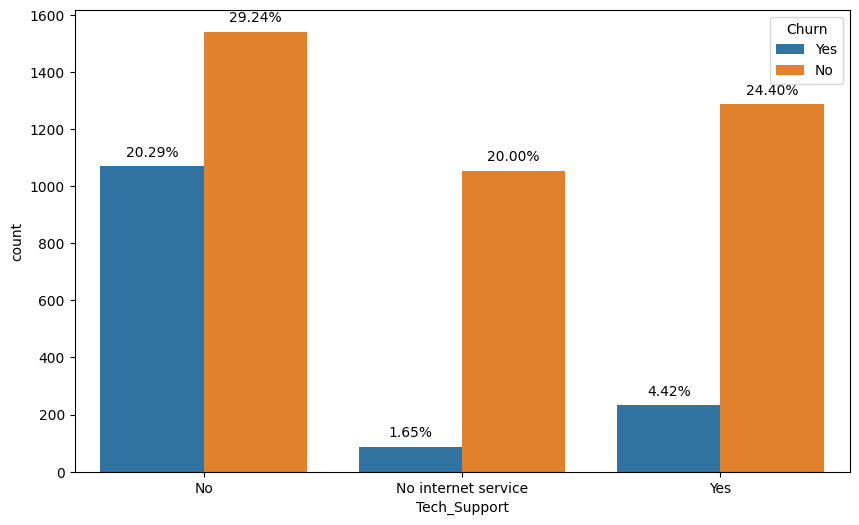

<Figure size 640x480 with 0 Axes>

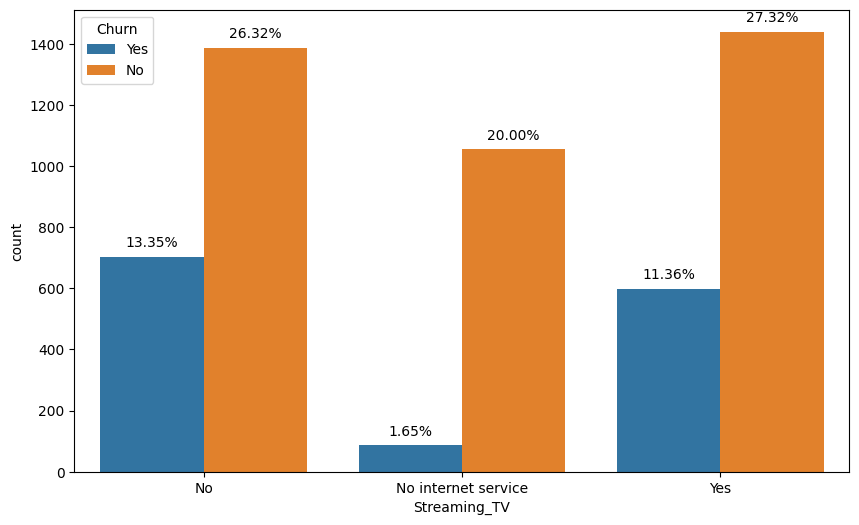

<Figure size 640x480 with 0 Axes>

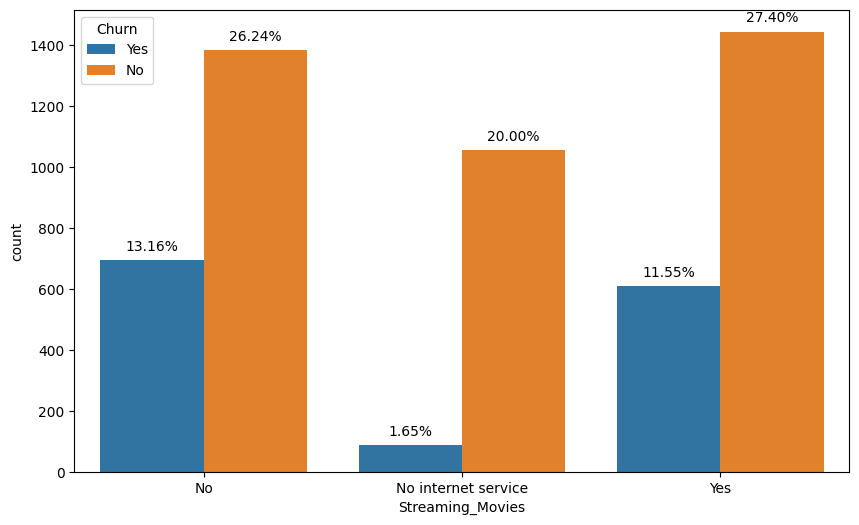

<Figure size 640x480 with 0 Axes>

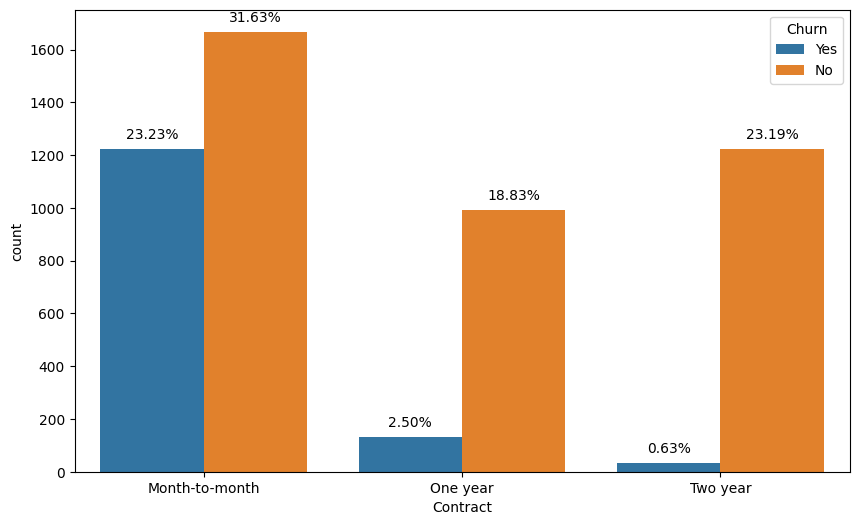

<Figure size 640x480 with 0 Axes>

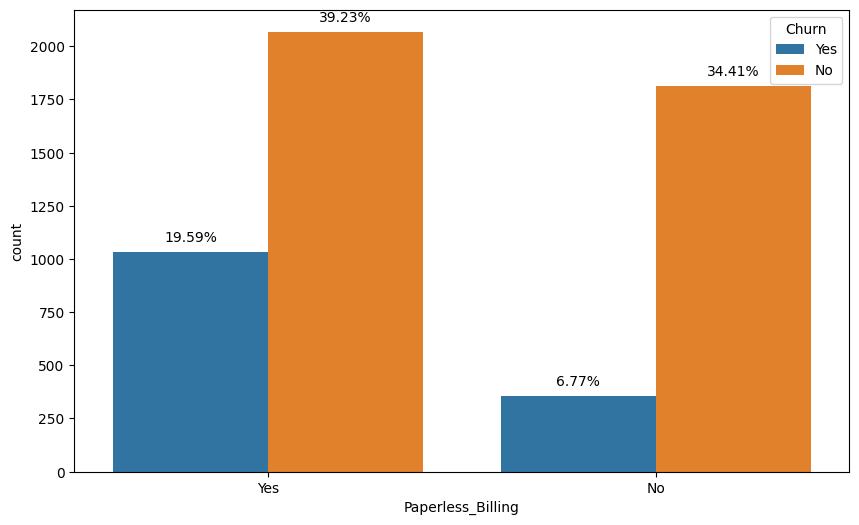

<Figure size 640x480 with 0 Axes>

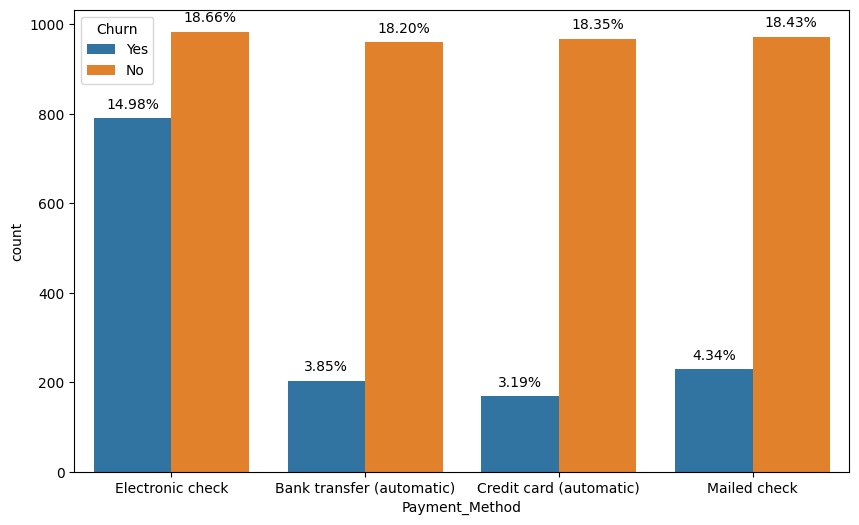

In [ ]:
for i, predictor in enumerate(train.drop(columns=['Churn', 'Total_Charges', 'Monthly_Charges', 'Tenure'])):
    plt.figure(i)
    fig, ax = plt.subplots(figsize=(10, 6))

    sns.countplot(data=train, x=predictor, hue='Churn')

    # Calculate percentages and add them on top of the bars
    total_count = len(train[predictor])
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Display percentage only if count is greater than 0
            ax.annotate(f'{(height / total_count) * 100:.2f}%',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.show()


Text(0.5, 1.0, 'Tenure by churn')

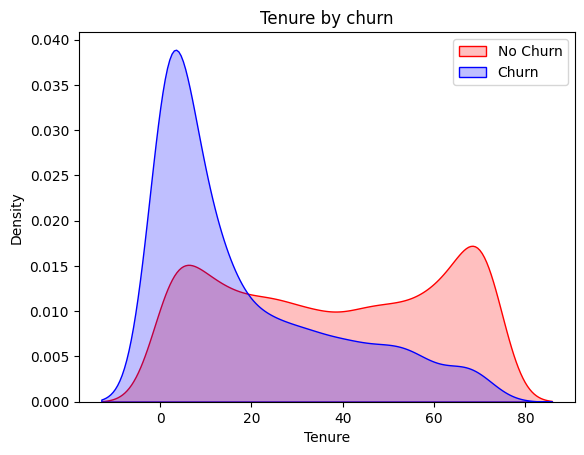

In [ ]:
Mth = sns.kdeplot(train.Tenure[(train["Churn"] == 'No') ],
                color="Red", shade = True)
Mth = sns.kdeplot(train.Tenure[(train["Churn"] == 'Yes') ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Tenure')
Mth.set_title('Tenure by churn')


Text(0.5, 1.0, 'Total Charges by Churn')

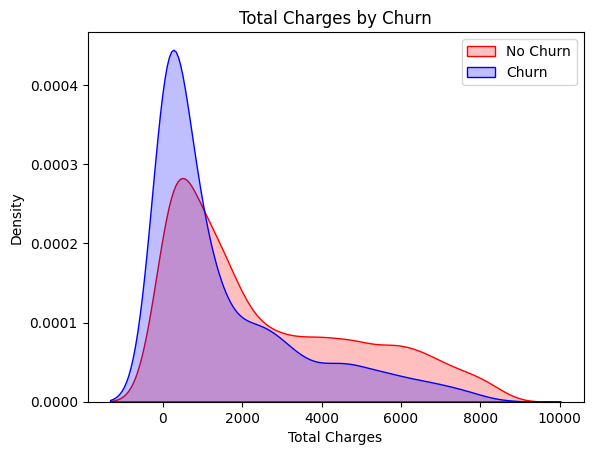

In [ ]:
Mth = sns.kdeplot(train.Total_Charges[(train["Churn"] == 'No') ],
                color="Red", shade = True)
Mth = sns.kdeplot(train.Total_Charges[(train["Churn"] == 'Yes') ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Total Charges')
Mth.set_title('Total Charges by Churn')


Text(0.5, 1.0, 'Monthly charges by Churn')

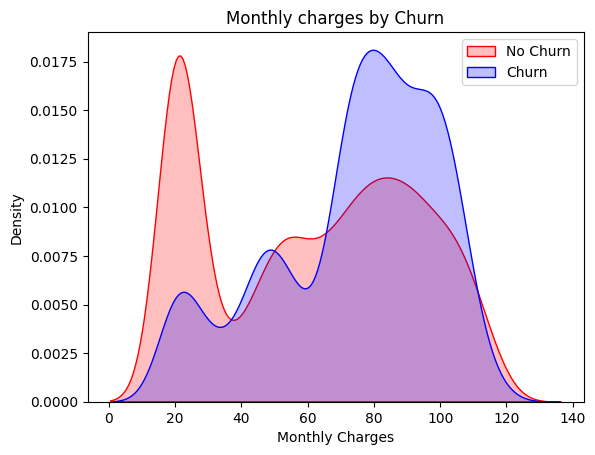

In [ ]:
Mth = sns.kdeplot(train.Monthly_Charges[(train["Churn"] == 'No') ],
                color="Red", shade = True)
Mth = sns.kdeplot(train.Monthly_Charges[(train["Churn"] == 'Yes') ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by Churn')


In [ ]:
train_c=train.copy()
test_c=test.copy()


In [ ]:
#listing categorical data
categorical_cols = train_c.select_dtypes(include=['object']).columns.tolist()
#using dummy encoding
df_encoded = pd.get_dummies(train_c, columns=categorical_cols)

df_encoded['Churn'] = train_c['Churn']
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5274 entries, 0 to 5281
Data columns (total 48 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Senior_Citizen                            5274 non-null   int64  
 1   Tenure                                    5274 non-null   int64  
 2   Monthly_Charges                           5274 non-null   float64
 3   Total_Charges                             5274 non-null   float64
 4   Gender_Female                             5274 non-null   uint8  
 5   Gender_Male                               5274 non-null   uint8  
 6   Partner_No                                5274 non-null   uint8  
 7   Partner_Yes                               5274 non-null   uint8  
 8   Dependents_No                             5274 non-null   uint8  
 9   Dependents_Yes                            5274 non-null   uint8  
 10  Phone_Service_No                    

In [ ]:
categorical_cols = test_c.select_dtypes(include=['object']).columns.tolist()
df_enctest = pd.get_dummies(test_c, columns=categorical_cols)


df_enctest.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1758 entries, 0 to 1760
Data columns (total 45 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Senior_Citizen                            1758 non-null   int64  
 1   Tenure                                    1758 non-null   int64  
 2   Monthly_Charges                           1758 non-null   float64
 3   Total_Charges                             1758 non-null   float64
 4   Gender_Female                             1758 non-null   uint8  
 5   Gender_Male                               1758 non-null   uint8  
 6   Partner_No                                1758 non-null   uint8  
 7   Partner_Yes                               1758 non-null   uint8  
 8   Dependents_No                             1758 non-null   uint8  
 9   Dependents_Yes                            1758 non-null   uint8  
 10  Phone_Service_No                    

In [ ]:
df_encoded = df_encoded.drop('Churn_Yes',axis=1)
df_encoded = df_encoded.drop('Churn_No',axis=1)


In [ ]:
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})
df_encoded.head()


,Senior_Citizen,Tenure,Monthly_Charges,Total_Charges,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank transfer (automatic),Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check,Churn
0,0,1,25.30,25.30,0,1,1,0,0,1,...,1,0,0,0,1,0,0,1,0,1
1,0,7,75.15,525.00,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,0
2,0,4,20.05,85.50,1,0,1,0,0,1,...,1,0,0,0,1,1,0,0,0,0
3,0,29,76.00,2215.25,1,0,1,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,0,3,75.10,270.70,1,0,1,0,1,0,...,1,0,0,0,1,0,1,0,0,1


<Axes: >

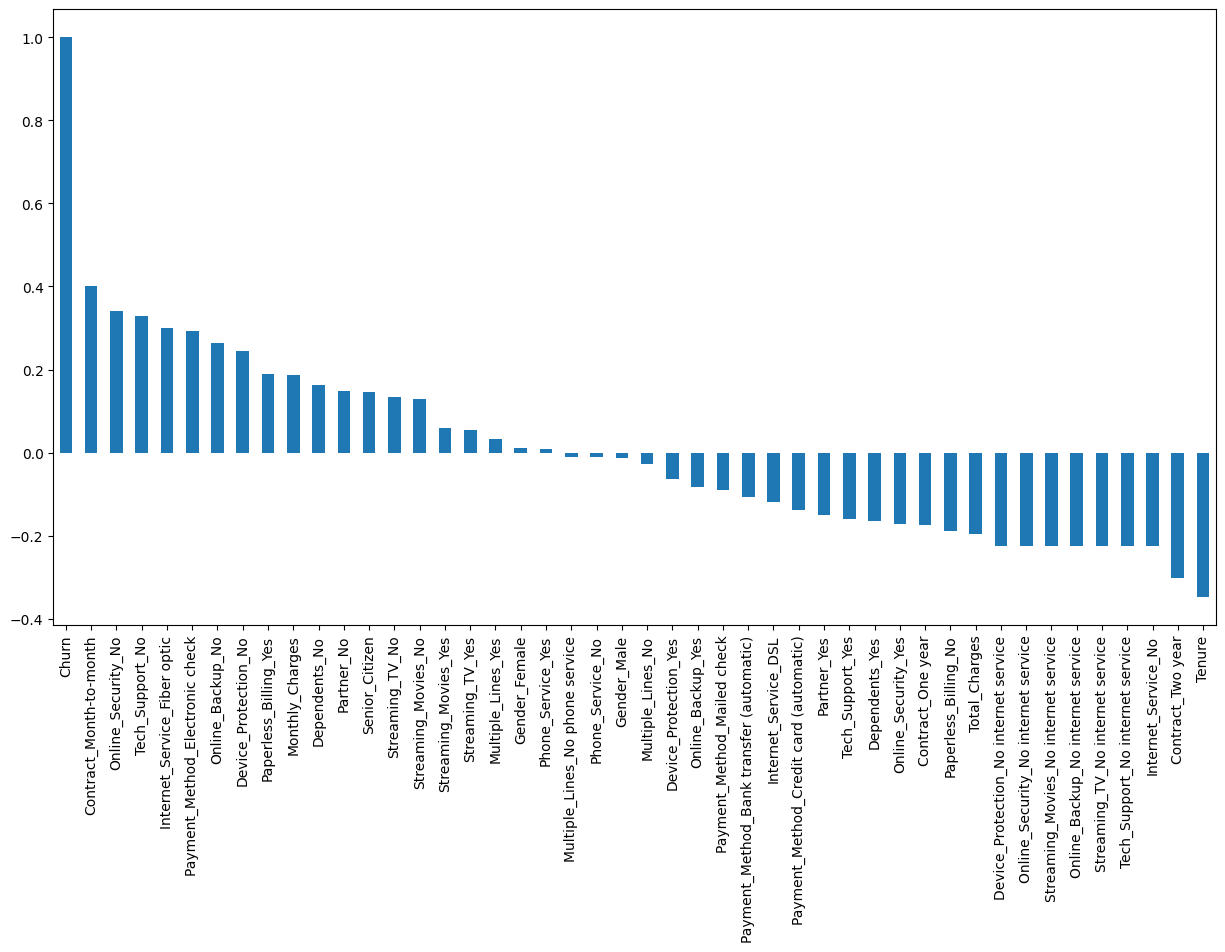

In [ ]:
#Corelation analysis
plt.figure(figsize=(15,8))
df_encoded.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [ ]:
#Scaling relevant columns
scaler = StandardScaler()
df_encoded[['Tenure','Monthly_Charges','Total_Charges']] = scaler.fit_transform(df_encoded[['Tenure','Monthly_Charges','Total_Charges']])
df_encoded.head()

,Senior_Citizen,Tenure,Monthly_Charges,Total_Charges,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank transfer (automatic),Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check,Churn
0,0,-1.285626,-1.312229,-0.998609,0,1,1,0,0,1,...,1,0,0,0,1,0,0,1,0,1
1,0,-1.040460,0.343387,-0.778334,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,0
2,0,-1.163043,-1.486591,-0.972072,1,0,1,0,0,1,...,1,0,0,0,1,1,0,0,0,0
3,0,-0.141518,0.371617,-0.033251,1,0,1,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,0,-1.203904,0.341727,-0.890433,1,0,1,0,1,0,...,1,0,0,0,1,0,1,0,0,1


In [ ]:
scaler = StandardScaler()
df_enctest[['Tenure','Monthly_Charges','Total_Charges']] = scaler.fit_transform(df_enctest[['Tenure','Monthly_Charges','Total_Charges']])

In [ ]:
df_encoded.isnull().sum()
df_encoded.head()

,Senior_Citizen,Tenure,Monthly_Charges,Total_Charges,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank transfer (automatic),Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check,Churn
0,0,-1.285626,-1.312229,-0.998609,0,1,1,0,0,1,...,1,0,0,0,1,0,0,1,0,1
1,0,-1.040460,0.343387,-0.778334,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,0
2,0,-1.163043,-1.486591,-0.972072,1,0,1,0,0,1,...,1,0,0,0,1,1,0,0,0,0
3,0,-0.141518,0.371617,-0.033251,1,0,1,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,0,-1.203904,0.341727,-0.890433,1,0,1,0,1,0,...,1,0,0,0,1,0,1,0,0,1


In [ ]:
X_train = df_encoded.drop('Churn', axis=1)
y_train = df_encoded['Churn']
X_test=df_enctest

In [ ]:
X_train_pred, X_test_pred, y_train_pred, y_test_pred = train_test_split(X_train, y_train, test_size=0.2, random_state=41)


In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)


In [ ]:
logistic_model = RandomForestClassifier()
logistic_model.fit(X_train_pred, y_train_pred)
y_pred_new = logistic_model.predict(X_test_pred)
accuracy = accuracy_score(y_test_pred, y_pred_new)
conf_matrix = confusion_matrix(y_test_pred, y_pred_new)
classification_report_str = classification_report(y_test_pred, y_pred_new)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print(f"Classification Report:\n{classification_report_str}")


Accuracy: 78.29%
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       799
           1       0.57      0.41      0.48       256

    accuracy                           0.78      1055
   macro avg       0.70      0.66      0.67      1055
weighted avg       0.77      0.78      0.77      1055



In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_pred, y_train_pred)
y_pred_new = logistic_model.predict(X_test_pred)
accuracy = accuracy_score(y_test_pred, y_pred_new)
conf_matrix = confusion_matrix(y_test_pred, y_pred_new)
classification_report_str = classification_report(y_test_pred, y_pred_new)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print(f"Classification Report:\n{classification_report_str}")



Accuracy: 81.04%
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       799
           1       0.63      0.52      0.57       256

    accuracy                           0.81      1055
   macro avg       0.74      0.71      0.72      1055
weighted avg       0.80      0.81      0.80      1055



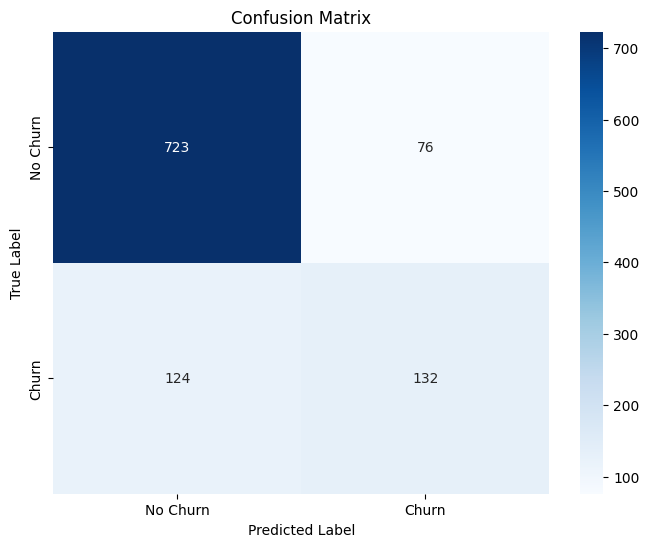

In [ ]:
conf_matrix = confusion_matrix(y_test_pred, y_pred_new)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
df = pd.DataFrame(y_pred,columns=['Churn'])

df.to_csv("y_test.csv", index=False)